# Engenharia de Recursos

## Dimensionamento de Atributos
Tecnica para padronizar os atributos independentes presentes nos dados para um intervalo fixo. Ela e realizada durente o pre-processamento dos dados

## Funcionamento:
Dado um conjunto de dados com: Idade, Salario, Apartamento BHK, com um tamanho de 5000 pessoas, cada um apresenta esses atributos de forma independente

- Classe 1 - SIM: Significa que, com a idade, salario e num de comodos, e possivel comprar o imovel
- Classe 2 - NAO: Significa que, com a idade, salario e num de comodos nao e possivel comprar o imovel

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df_train = pd.read_csv('train.csv')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
for index, valor in df_train.iterrows():
    if pd.isnull(valor['Age']):
        if valor['Pclass'] == 1:
            df_train.at[index, 'Age'] = 37
        elif valor['Pclass'] == 2:
            df_train.at[index, 'Age'] = 29
        else:
            df_train.at[index, 'Age'] = 24

In [6]:
df_train.dropna(subset=['Embarked'], axis=0,inplace=True)

In [7]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.019314,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,13.209814,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,36.500000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Dados Numericos

In [8]:
# df_num = df.drop(columns=['PassengerId']).select_dtypes(include='number')
df_train_num = df_train.drop(columns=['Name','Sex','Ticket','Cabin','Embarked'])

<Axes: >

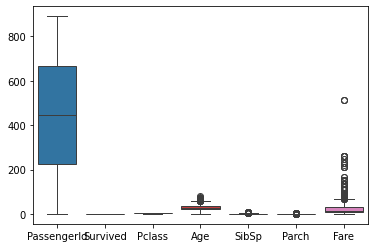

In [9]:
sns.boxplot(df_train_num)

<Axes: ylabel='Age'>

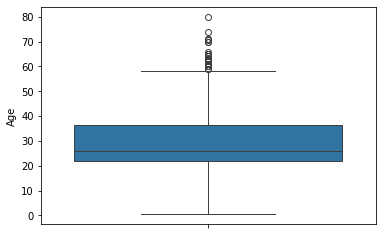

In [10]:
sns.boxplot(df_train_num['Age'])

In [11]:
Q1 = np.percentile(df_train_num['Age'], q=25)
Q2 = np.percentile(df_train_num['Age'], q=75)
IRQ = Q2 - Q1
limite_inferior = Q1 - (1.5 * IRQ)
limite_superior = Q2 + (1.5 * IRQ)
df_train_num = df_train_num[(df_train_num['Age'] >= limite_inferior) & (df_train_num['Age'] <= limite_superior)]

<Axes: ylabel='Age'>

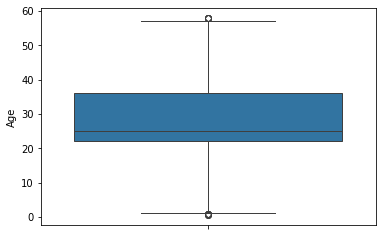

In [12]:
sns.boxplot(df_train_num['Age'])

<Axes: ylabel='SibSp'>

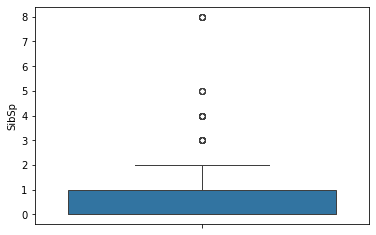

In [13]:
sns.boxplot(df_train_num['SibSp'])

In [14]:
Q1 = np.percentile(df_train_num['SibSp'], q=25)
Q2 = np.percentile(df_train_num['SibSp'], q=75)
IRQ = Q2 - Q1
limite_inferior = Q1 - (1.5 * IRQ)
limite_superior = Q2 + (1.5 * IRQ)
df_train_num = df_train_num[(df_train_num['SibSp'] >= limite_inferior) & (df_train_num['SibSp'] <= limite_superior)]

<Axes: ylabel='SibSp'>

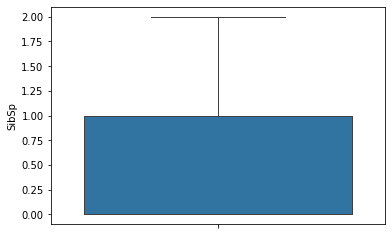

In [15]:
sns.boxplot(df_train_num['SibSp'])

<Axes: ylabel='Parch'>

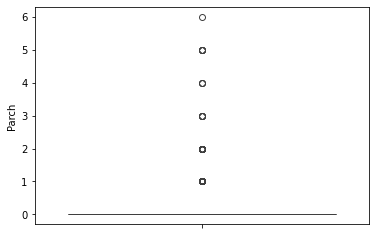

In [16]:
sns.boxplot(df_train_num['Parch'])

In [17]:
Q1 = np.percentile(df_train_num['Parch'], q=25)
Q2 = np.percentile(df_train_num['Parch'], q=75)
IRQ = Q2 - Q1
limite_inferior = Q1 - (1.5 * IRQ)
limite_superior = Q2 + (1.5 * IRQ)
df_train_num = df_train_num[(df_train_num['Parch'] >= limite_inferior) & (df_train_num['Parch'] <= limite_superior)]

<Axes: ylabel='Parch'>

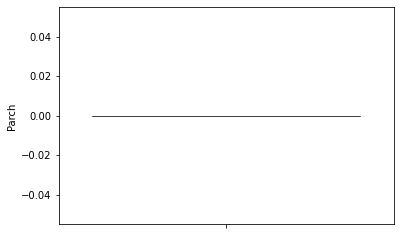

In [18]:
sns.boxplot(df_train_num['Parch'])

<Axes: ylabel='Fare'>

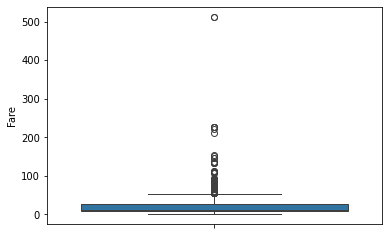

In [19]:
sns.boxplot(df_train_num['Fare'])

In [20]:
Q1 = np.percentile(df_train_num['Fare'], q=25)
Q2 = np.percentile(df_train_num['Fare'], q=75)
IRQ = Q2 - Q1
limite_inferior = Q1 - (1.5 * IRQ)
limite_superior = Q2 + (1.5 * IRQ)
df_train_num = df_train_num[(df_train_num['Fare'] >= limite_inferior) & (df_train_num['Fare'] <= limite_superior)]

<Axes: ylabel='Fare'>

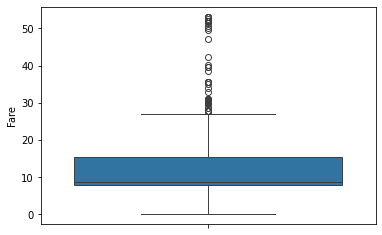

In [21]:
sns.boxplot(df_train_num['Fare'])

In [22]:
# Escala Maxima Absoluta:
pontoMax = df_train_num.max() 

print((df_train_num - pontoMax) / pontoMax)


     PassengerId  Survived    Pclass       Age  SibSp  Parch      Fare
0      -0.998878      -1.0  0.000000 -0.620690   -0.5    NaN -0.863465
2      -0.996633       0.0  0.000000 -0.551724   -1.0    NaN -0.850753
3      -0.995511       0.0 -0.666667 -0.396552   -0.5    NaN  0.000000
4      -0.994388      -1.0  0.000000 -0.396552   -1.0    NaN -0.848399
5      -0.993266      -1.0  0.000000 -0.586207   -1.0    NaN -0.840710
..           ...       ...       ...       ...    ...    ...       ...
884    -0.006734      -1.0  0.000000 -0.568966   -1.0    NaN -0.867232
886    -0.004489      -1.0 -0.333333 -0.534483   -1.0    NaN -0.755179
887    -0.003367       0.0 -0.666667 -0.672414   -1.0    NaN -0.435028
889    -0.001122       0.0 -0.666667 -0.551724   -1.0    NaN -0.435028
890     0.000000      -1.0  0.000000 -0.448276   -1.0    NaN -0.854049

[571 rows x 7 columns]


In [23]:
# Escala Min-Max

pontoMin = df_train_num.min()
print((df_train_num - pontoMin) / (pontoMax - pontoMin))

     PassengerId  Survived  Pclass       Age  SibSp  Parch      Fare
0       0.000000       0.0     1.0  0.320755    0.5    NaN  0.136535
2       0.002247       1.0     1.0  0.396226    0.0    NaN  0.149247
3       0.003371       1.0     0.0  0.566038    0.5    NaN  1.000000
4       0.004494       0.0     1.0  0.566038    0.0    NaN  0.151601
5       0.005618       0.0     1.0  0.358491    0.0    NaN  0.159290
..           ...       ...     ...       ...    ...    ...       ...
884     0.993258       0.0     1.0  0.377358    0.0    NaN  0.132768
886     0.995506       0.0     0.5  0.415094    0.0    NaN  0.244821
887     0.996629       1.0     0.0  0.264151    0.0    NaN  0.564972
889     0.998876       1.0     0.0  0.396226    0.0    NaN  0.564972
890     1.000000       0.0     1.0  0.509434    0.0    NaN  0.145951

[571 rows x 7 columns]


In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(df_train_num)
scaled_df = pd.DataFrame(scaled_data, columns=df_train_num.columns)

scaled_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,0.000000,0.0,1.0,0.320755,0.5,0.0,0.136535
1,0.002247,1.0,1.0,0.396226,0.0,0.0,0.149247
2,0.003371,1.0,0.0,0.566038,0.5,0.0,1.000000
3,0.004494,0.0,1.0,0.566038,0.0,0.0,0.151601
4,0.005618,0.0,1.0,0.358491,0.0,0.0,0.159290


In [25]:
# Padronizacao - Usada para algoritmos como regressao linear - Dimensiona os dados para ter uma media de 0 e desvio padrao de 1

std_vals = df_train_num.std()
print((df_train_num - df_train_num.mean()) / (std_vals))

     PassengerId  Survived    Pclass       Age     SibSp  Parch      Fare
0      -1.718163 -0.634226  0.682465 -0.756299  1.858691    NaN -0.625499
2      -1.710473  1.573963  0.682465 -0.336061 -0.428621    NaN -0.561855
3      -1.706627  1.573963 -2.061813  0.609474  1.858691    NaN  3.697562
4      -1.702782 -0.634226  0.682465  0.609474 -0.428621    NaN -0.550070
5      -1.698937 -0.634226  0.682465 -0.546180 -0.428621    NaN -0.511572
..           ...       ...       ...       ...       ...    ...       ...
884     1.681004 -0.634226  0.682465 -0.441121 -0.428621    NaN -0.644357
886     1.688694 -0.634226 -0.689674 -0.231002 -0.428621    NaN -0.083349
887     1.692539  1.573963 -2.061813 -1.071478 -0.428621    NaN  1.519531
889     1.700230  1.573963 -2.061813 -0.336061 -0.428621    NaN  1.519531
890     1.704075 -0.634226  0.682465  0.294295 -0.428621    NaN -0.578356

[571 rows x 7 columns]


In [26]:
# Normalizacao - garante contribuicao igual dos atributos - Intervalo especifico ou valor unitario

media = df_train_num.mean()
print((df_train_num - df_train_num.mean()) / (pontoMax - pontoMin))

     PassengerId  Survived    Pclass       Age     SibSp  Parch      Fare
0      -0.502058 -0.287215  0.248687 -0.135826  0.406305    NaN -0.124934
2      -0.499811  0.712785  0.248687 -0.060354 -0.093695    NaN -0.112222
3      -0.498687  0.712785 -0.751313  0.109457  0.406305    NaN  0.738531
4      -0.497564 -0.287215  0.248687  0.109457 -0.093695    NaN -0.109868
5      -0.496440 -0.287215  0.248687 -0.098090 -0.093695    NaN -0.102179
..           ...       ...       ...       ...       ...    ...       ...
884     0.491200 -0.287215  0.248687 -0.079222 -0.093695    NaN -0.128700
886     0.493447 -0.287215 -0.251313 -0.041486 -0.093695    NaN -0.016648
887     0.494571  0.712785 -0.751313 -0.192430 -0.093695    NaN  0.303503
889     0.496818  0.712785 -0.751313 -0.060354 -0.093695    NaN  0.303503
890     0.497942 -0.287215  0.248687  0.052853 -0.093695    NaN -0.115518

[571 rows x 7 columns]


In [27]:
# Robust Scaler

print( (df_train_num - df_train_num.median() / (df_train_num.quantile(.75) - df_train_num.quantile(.25))))

     PassengerId  Survived  Pclass        Age  SibSp  Parch       Fare
0       0.002203       0.0     0.0  19.636364    NaN    NaN   6.128641
2       2.002203       1.0     0.0  23.636364    NaN    NaN   6.803641
3       3.002203       1.0    -2.0  32.636364    NaN    NaN  51.978641
4       4.002203       0.0     0.0  32.636364    NaN    NaN   6.928641
5       5.002203       0.0     0.0  21.636364    NaN    NaN   7.336941
..           ...       ...     ...        ...    ...    ...        ...
884   884.002203       0.0     0.0  22.636364    NaN    NaN   5.928641
886   886.002203       0.0    -1.0  24.636364    NaN    NaN  11.878641
887   887.002203       1.0    -2.0  16.636364    NaN    NaN  28.878641
889   889.002203       1.0    -2.0  23.636364    NaN    NaN  28.878641
890   890.002203       0.0     0.0  29.636364    NaN    NaN   6.628641

[571 rows x 7 columns]


# Dados Categoricos

In [28]:
df_train_cat = df_train[['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']]

In [29]:
df_train_cat.head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


In [30]:
df_train_cat.nunique()

Name        889
Sex           2
Ticket      680
Cabin       146
Embarked      3
dtype: int64

In [31]:
df_train_cat['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [32]:
# Codificacao de Rotulos

from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

df_train['Embarked'] = label_encoder.fit_transform(df_train['Embarked'])
df_train['Embarked'].unique()

array([2, 0, 1])

In [33]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,2
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,NaN,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,0


In [34]:
# Codificacao One-hot
df_train_cat['Sex'].unique()
df_train_cat['Sex'].value_counts()

Sex
male      577
female    312
Name: count, dtype: int64

In [35]:
one_hot_encoded_data = pd.get_dummies(df_train, columns=['Sex'])
print(one_hot_encoded_data)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name   Age  SibSp  Parch  \
0                              Braund, Mr. Owen Harris  22.0      1      0   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                               Heikkinen, Miss. Laina  26.0      0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                             Allen, Mr. William Henry  35.0      0      0   
..                                                 ...   ...    ...    ... 